In [1]:
import sys   
!{sys.executable} -m pip install boruta
import csv
import pandas as pd
import numpy as np
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import os
from sklearn import tree
import csv
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
from sklearn.ensemble import RandomForestClassifier
from boruta import boruta_py  #모듈을 _py 식으로 직접 호출하면 aaa.aa(dd,dd) 이런식으로 사용해야된다.!! 
import pandas as pd
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

ata =[]
df = pd.read_csv('./정제.csv')
df = df.sample(frac=1)
df0 = df['MRC_ID_DI'] != -1

df2=df[df0]
print(df2)
dfy = df2['MRC_ID_DI']
data_ratio=[]
for i in df['MRC_ID_DI']:
    if i != -1:
        data_ratio.append(i)

for i in range(0, 11):
    print("%-4d %-4d %.1f%%" % (i, data_ratio.count(i), data_ratio.count(i)/len(data_ratio) * 100))

dfy.to_csv('./임시.csv')
y = dfy.iloc[0:]
del df2['MRC_ID_DI']
del df2['cst_id_di']
df2.to_csv('dummy_.csv')
X=df2.iloc[0:]
featureColumns = df2.columns.tolist()
del featureColumns[0]

        cst_id_di   VAR002  VAR003   VAR004   VAR005   VAR006  VAR007  VAR008  \
9835  90000445690 -0.02090  0.3257 -0.19820  0.09992 -0.37731       0  0.0521   
4139  90000185129 -0.01269  0.6084  0.09351 -0.06173  0.62427       0  0.4719   
4031  90000180393 -0.06015  0.1460 -0.10498  0.13753 -0.20836       0  0.1560   
3269  90000146780  0.02812  0.8549 -0.07349 -0.04148  0.69874       0  0.2450   
352   90000016017  0.03012  0.5397  0.12648 -0.18476  0.54152       0  0.3722   
...           ...      ...     ...      ...      ...      ...     ...     ...   
52    90000002007 -0.07992  0.3691  0.28136 -0.02926  0.06973       0  0.0376   
7098  90000321660 -0.03009  0.8706  0.39773 -0.37083 -0.29597       0  0.9407   
8860  90000401566 -0.03401  0.6466  0.36622 -0.13226  0.44868       1  0.2895   
5414  90000245002 -0.04551  0.9665  0.28909 -0.05768  0.28857       0  0.7143   
8845  90000400631 -0.05548  0.6495 -0.10885 -0.00797  0.10716       0  0.0511   

       VAR009  VAR010  ... 

In [2]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)
y_new=y
X_new=X
y = pd.read_csv('./임시.csv', header=None, index_col=0).values
y = y.ravel()
X.to_csv('./임시2.csv')
X = pd.read_csv('./임시2.csv', index_col=0).values
y=np.delete(y,0)



In [4]:
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

feat_selector = boruta_py.BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

feat_selector.fit(X, y)

feat_selector.support_

feat_selector.ranking_

X_filtered = feat_selector.transform(X)



Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	226
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	226
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	226
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	226
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	226
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	226
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	226
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	27
Rejected: 	199
Iteration: 	9 / 100
Confirmed: 	9
Tentative: 	18
Rejected: 	199
Iteration: 	10 / 100
Confirmed: 	9
Tentative: 	18
Rejected: 	199
Iteration: 	11 / 100
Confirmed: 	9
Tentative: 	18
Rejected: 	199
Iteration: 	12 / 100
Confirmed: 	10
Tentative: 	14
Rejected: 	202
Iteration: 	13 / 100
Confirmed: 	10
Tentative: 	14
Rejected: 	202
Iteration: 	14 / 100
Confirmed: 	10
Tentative: 	14
Rejected: 	202
Iteration: 	15 / 100
Confirmed: 	10
Tentative: 	14
Rejected: 	202
Iteration: 	16 / 100
Confirmed: 	11
T

VAR010
VAR021
VAR024
VAR050
VAR076
VAR079
VAR104
VAR117
VAR120
VAR133
VAR138
VAR192
VAR214
VAR217
VAR226
['VAR010', 'VAR021', 'VAR024', 'VAR050', 'VAR076', 'VAR079', 'VAR104', 'VAR117', 'VAR120', 'VAR133', 'VAR138', 'VAR192', 'VAR214', 'VAR217', 'VAR226']


c:\users\minisong\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[0 0 0 ... 0 0 0]


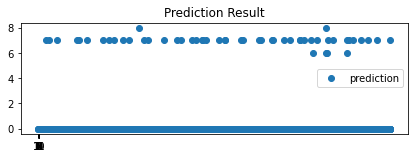

In [5]:
from sklearn.metrics import accuracy_score
Feature=feat_selector.support_
Feature_list=Feature.tolist()
Var_Num=[]
Var_Data=[]
for i in range(0,len(Feature_list)):
    if Feature_list[i] == True:
        Var_Num.append(i)
for i in range(0,len(Var_Num)):
    print(df2.columns[Var_Num[i]])
    Var_Data.append(df2.columns[Var_Num[i]])
print(Var_Data)


X_new2 = X_new[Var_Data]
X_train, X_test, Y_train, Y_test = train_test_split(X_new2, y_new, test_size=0.3)
model =LogisticRegression()
model.fit(X_train,Y_train)
ax2 = plt.subplot(212)
predict_result=model.predict(X_test)
pd.DataFrame(predict_result, columns=["prediction"]).plot(marker='o', ls="", ax=ax2,label=[0,1,2,3,4,5,6,7,8,9,10])
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11])
print(predict_result)
plt.title("Prediction Result")
plt.tight_layout()
plt.show()

x=[0,1,2,3,4,5,6,7,8,9,10]